# tabletop calibration

Make sure that the simulation is running:

```bash
roslaunch handy_warehouse_demo tabletop.launch
```

And with this we can do a bit of analysis on the images. We've changed the color of the table's material to make it easy to mask against other objects.

- https://stanford.edu/class/ee367/Winter2015/report_loewke.pdf
- https://pvela.gatech.edu/classes/doku.php?id=ece4580:schedule

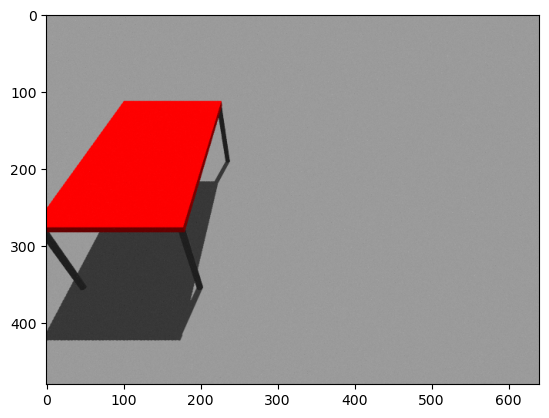

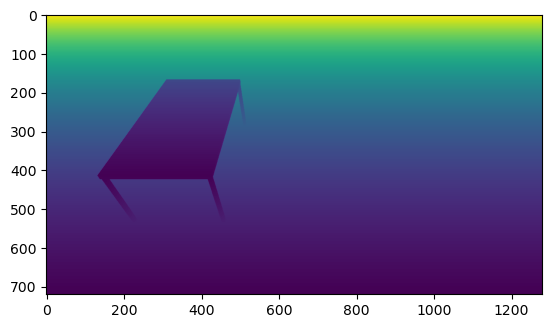

In [1]:
import matplotlib.pyplot as plt
import rospy
from cv_bridge import CvBridge
from sensor_msgs.msg import Image

rospy.init_node("realsense_subscriber")
bridge = CvBridge()

msg = rospy.wait_for_message("/camera/color/image_raw", Image)
rgb = bridge.imgmsg_to_cv2(msg, msg.encoding)

msg = rospy.wait_for_message("/camera/depth/image_raw", Image)
depth = bridge.imgmsg_to_cv2(msg, msg.encoding)

plt.imshow(rgb)
plt.show()

plt.imshow(depth)
plt.show()

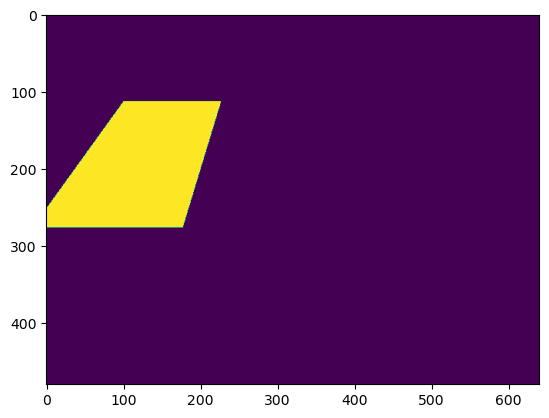

In [2]:
red = rgb[:, :, 0]
red_mask = (red - red.mean())/red.std() > 1
plt.imshow(red_mask)

We have difficulty converting between the color image and the depth map, because they do not map cleanly. See documentation on the [realsense wiki](https://github.com/IntelRealSense/librealsense/wiki/Projection-in-RealSense-SDK-2.0).

In [3]:
from sensor_msgs.msg import PointCloud2

msg = rospy.wait_for_message("/camera/depth/color/points", PointCloud2)
msg

# appendix

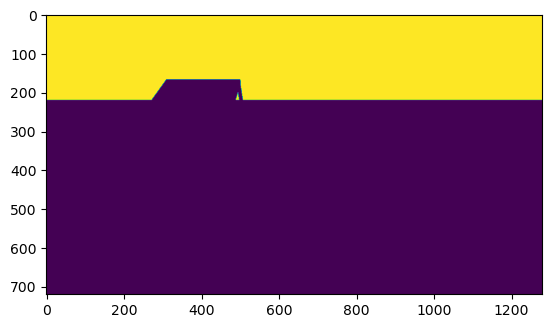

In [55]:
from scipy.cluster.vq import kmeans2, whiten
import numpy as np

# compute kmeans from depth

shape = depth.shape
X = whiten(depth.reshape(-1, 1))
_, label = kmeans2(X, 2)
label_img = label.reshape(shape)
plt.imshow(label_img)
plt.show()

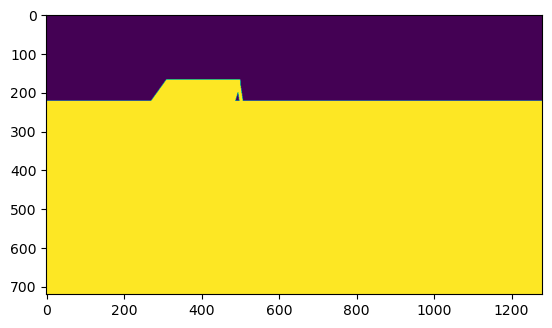

In [56]:
import cv2 as cv

gray = (depth/depth.max()*255).astype(np.uint8)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)